In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv(r'C:\DA12\Projects\un-python-ryanhartman247\data\gdp_percapita.csv')

### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
type(gdp_df)

pandas.core.frame.DataFrame

In [28]:
gdp_df.head(10)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
del gdp_df['Value Footnotes']   # this deletes column value footnotes

In [10]:
gdp_df.info()   #to check that column was deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [11]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']   #rename columns

In [12]:
gdp_df.info()   #to check that columns were renamed correctly 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [347]:
missing = gdp_df.isnull().sum()     # I don't think this worked?
print(missing)

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64


In [30]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [307]:
gdp_df['Year'].unique()    # counts unique years (I was hoping to find a blank or n/a option but doesn't look like those show)

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [391]:
num_years = gdp_df.Year.nunique()    # counts number of unique years (33) 
print(num_years)

33


In [405]:
all_countries = gdp_df.groupby('Country').nunique().sort_values('Year')
print(all_countries.head(5))
print('Total number of countries:', len(all_countries))
country_missing_years = count_years[count_years.Year == num_years].sort_values(['Year', 'Country'])  # sorts by count of year first, then by country 
print(country_missing_years.head())

len_count_years = len(count_years)
print(len_count_years)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
Total number of countries: 242
                             Year  GDP_Per_Capita
Country                                          
Africa Eastern and Southern    33              33
Africa Western and Central     33              33
Albania                        33              33
Algeria                        33              33
Angola                         33              33
242


In [357]:
total_years = gdp_df.Year.nunique()
countries_with_all_years = count_years[count_years == total_years].index.tolist()
#print(countries_with_all_years)
num = len(countries_with_all_years)
print(num)

242


In [238]:
gdp_df['Year'].value_counts()    # counts number of countries for each year? 

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

<Axes: xlabel='Year'>

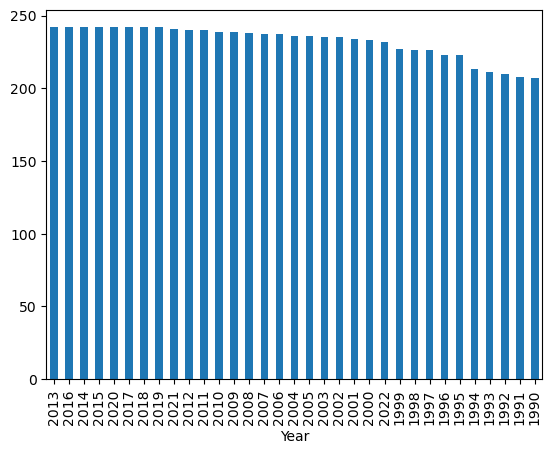

In [206]:
gdp_df['Year'].value_counts().plot(
                 kind = 'bar', 
                 x = 'Year', 
                 y = 'number')

In [118]:
gdp_df.loc[600:605]    # returns a slice

,Country,Year,GDP_Per_Capita
600,Belgium,2002,43890.598110
601,Belgium,2001,43347.889210
602,Belgium,2000,43024.139910
603,Belgium,1999,41583.097392
604,Belgium,1998,40252.468906
605,Belgium,1997,39562.372980


In [112]:
gdp_df.loc[gdp_df['Year']==2019]     # returns data where year equals certain value 

,Country,Year,GDP_Per_Capita
2,Afghanistan,2019,2079.921861
23,Africa Eastern and Southern,2019,3648.220302
56,Africa Western and Central,2019,4093.442853
89,Albania,2019,13653.182207
122,Algeria,2019,11627.279918
...,...,...,...
7504,Viet Nam,2019,10252.004622
7537,West Bank and Gaza,2019,6245.448697
7566,World,2019,16864.894576
7599,Zambia,2019,3372.358980


In [140]:
gdp_df.loc[gdp_df.Year.isin([2019, 2020])]   # different syntax to return same as above, but with multiple options

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
22,Africa Eastern and Southern,2020,3455.023119
23,Africa Eastern and Southern,2019,3648.220302
55,Africa Western and Central,2020,3957.933804
...,...,...,...
7566,World,2019,16864.894576
7598,Zambia,2020,3183.650773
7599,Zambia,2019,3372.358980
7631,Zimbabwe,2020,1990.319419


In [240]:
gdp_df.loc[gdp_df.Year.isna()]    # I thought this was supposed to return the location where year equals n/a ? 

,Country,Year,GDP_Per_Capita


In [256]:
gdp_df.isna().sum    # it doesn't look like any columns have n/a? 
# gdp_df.Year.isna().sum

<bound method DataFrame.sum of       Country   Year  GDP_Per_Capita
0       False  False           False
1       False  False           False
2       False  False           False
3       False  False           False
4       False  False           False
...       ...    ...             ...
7657    False  False           False
7658    False  False           False
7659    False  False           False
7660    False  False           False
7661    False  False           False

[7662 rows x 3 columns]>

In [186]:
gdp_df.GDP_Per_Capita.describe()

count      7662.000000
mean      17206.979219
std       19363.258695
min         436.376416
25%        3655.268993
50%       10132.449293
75%       24119.515045
max      157602.482546
Name: GDP_Per_Capita, dtype: float64

<Axes: >

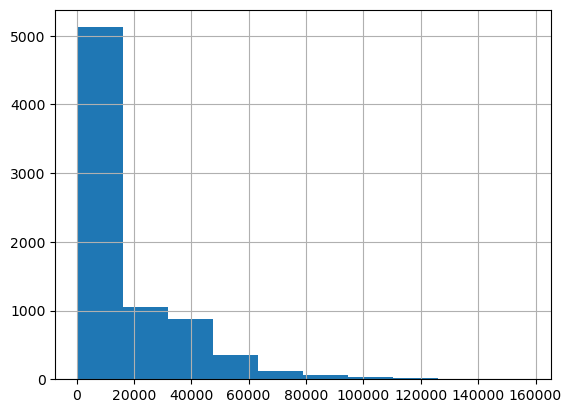

In [214]:
gdp_df.GDP_Per_Capita.hist()

In [242]:
gdp_df.groupby('Year')['Year'].mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000287D7BBD760>>

In [250]:
gdp_df.isnull()

,Country,Year,GDP_Per_Capita
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7657,False,False,False
7658,False,False,False
7659,False,False,False
7660,False,False,False


### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

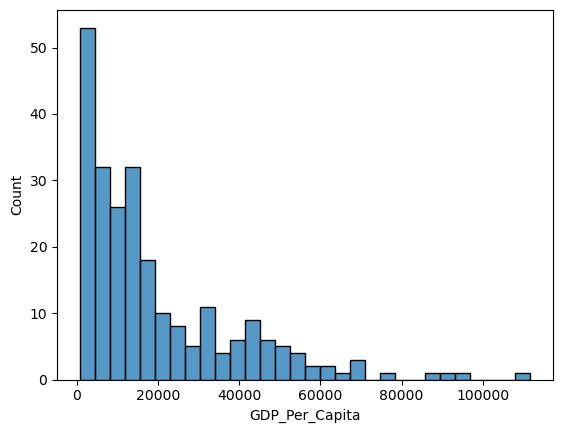

In [303]:
gdp_df_2020 = gdp_df[gdp_df.Year==2020]
#print(gdp_df_2020.head(15))

#df = sns.load_dataset(gdp_df)  # I guess this line isn't necessary?? 
sns.histplot(data=gdp_df_2020, x='GDP_Per_Capita', bins=30)
#plt.xticks(rotation=90)
plt.show()